In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

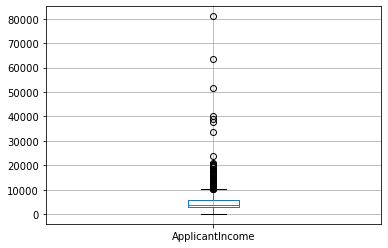

In [18]:
df.boxplot(column = 'ApplicantIncome')

<AxesSubplot:>

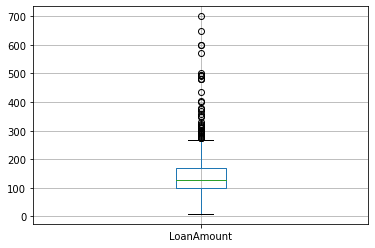

In [19]:
df.boxplot(column = 'LoanAmount')

<AxesSubplot:>

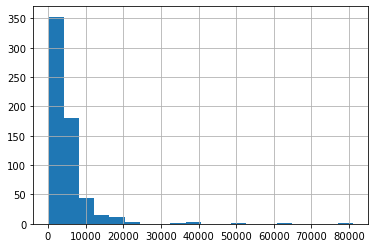

In [21]:
df['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

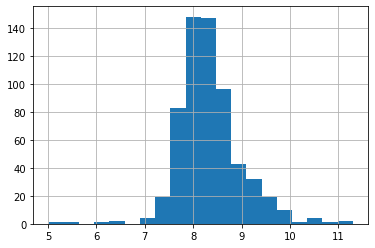

In [23]:
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])
df['ApplicantIncome_log'].hist(bins = 20)

<AxesSubplot:>

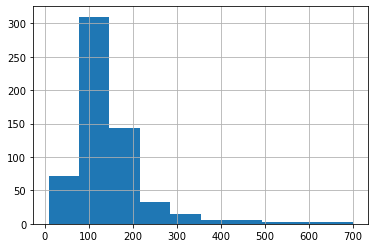

In [22]:
df['LoanAmount'].hist(bins = 10)

<AxesSubplot:>

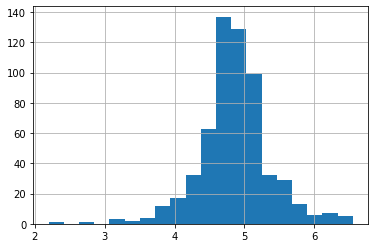

In [24]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20)

In [25]:
df['Gender'].isnull().sum()

13

In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [30]:
df['Gender'].fillna(value = df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(value = df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(value = df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(value = df['Self_Employed'].mode()[0], inplace = True)
df['LoanAmount_log'].fillna(value = df['LoanAmount_log'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(value = df['Loan_Amount_Term'].mean(), inplace = True)
df['Credit_History'].fillna(value = df['Credit_History'].mode()[0], inplace = True)

In [31]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    object 
 3   Dependents           614 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        614 non-null    object 
 6   ApplicantIncome      614 non-null    int64  
 7   CoapplicantIncome    614 non-null    float64
 8   LoanAmount           592 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
 13  ApplicantIncome_log  614 non-null    float64
 14  LoanAmount_log       614 non-null    float64
dtypes: float64(6), int64(1), object(8)
memor

In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Loan_ID'] = lb.fit_transform(df['Loan_ID'])
df['Gender']=lb.fit_transform(df['Gender'])
df['Married']=lb.fit_transform(df['Married'])
df['Dependents'] = lb.fit_transform(df['Dependents'])
df['Education'] = lb.fit_transform(df['Education'])
df['Self_Employed'] = lb.fit_transform(df['Self_Employed'])
df['Property_Area'] = lb.fit_transform(df['Property_Area'])
df['Loan_Status'] = lb.fit_transform(df['Loan_Status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    int32  
 1   Gender               614 non-null    int32  
 2   Married              614 non-null    int32  
 3   Dependents           614 non-null    int32  
 4   Education            614 non-null    int32  
 5   Self_Employed        614 non-null    int32  
 6   ApplicantIncome      614 non-null    int64  
 7   CoapplicantIncome    614 non-null    float64
 8   LoanAmount           592 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Property_Area        614 non-null    int32  
 12  Loan_Status          614 non-null    int32  
 13  ApplicantIncome_log  614 non-null    float64
 14  LoanAmount_log       614 non-null    float64
dtypes: float64(6), int32(8), int64(1)
memory

In [39]:
X = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome_log', 'CoapplicantIncome',
       'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(411, 12) (203, 12) (411,) (203,)


In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

<AxesSubplot:>

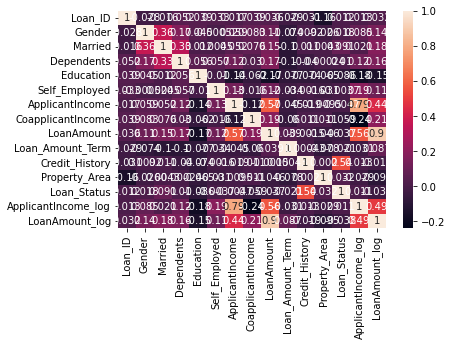

In [62]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

In [64]:
pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1])

In [65]:
from sklearn.metrics import classification_report, accuracy_score
cr = classification_report(y_test, pred)

In [66]:
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        72
           1       0.77      0.82      0.79       131

    accuracy                           0.72       203
   macro avg       0.70      0.69      0.69       203
weighted avg       0.72      0.72      0.72       203



<AxesSubplot:>

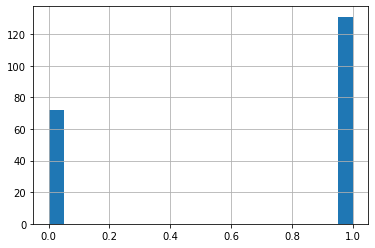

In [60]:
y_test.hist(bins = 20)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



[Text(240.03223140495868, 526.6125000000001, 'X[10] <= -1.091\ngini = 0.413\nsamples = 411\nvalue = [120, 291]'),
 Text(112.06115702479339, 492.63750000000005, 'X[7] <= 2.41\ngini = 0.168\nsamples = 54\nvalue = [49, 5]'),
 Text(100.99338842975206, 458.6625, 'X[6] <= 0.003\ngini = 0.14\nsamples = 53\nvalue = [49, 4]'),
 Text(78.85785123966942, 424.6875, 'X[9] <= -1.445\ngini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(67.7900826446281, 390.7125, 'X[6] <= -0.819\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(56.72231404958678, 356.7375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(78.85785123966942, 356.7375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(89.92561983471074, 390.7125, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(123.1289256198347, 424.6875, 'X[6] <= 0.237\ngini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(112.06115702479339, 390.7125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(134.19669421487603, 390.7125, 'gini = 0.0\nsamples = 16\nvalue

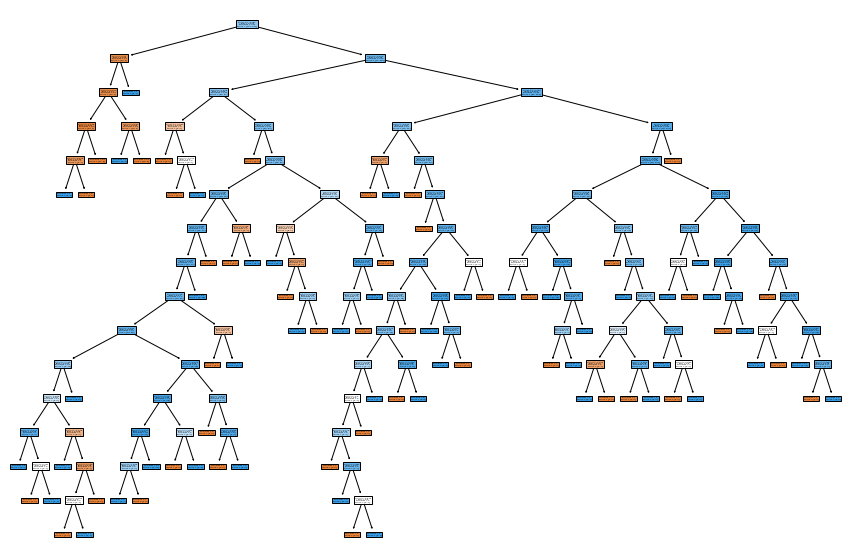

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(dtc, filled=True)

In [87]:
parameter = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}


In [88]:
X_train.shape

(411, 12)

In [164]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(estimator = dtc, param_grid = parameter, cv=13)
gscv.fit(X_train, y_train)
y_prediction = gscv.predict(X_test)

In [165]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [166]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203

